## Ecuaciones Difereciales Ordinarias
Una ecuación diferencial ordinaria (comúnmente abreviada "EDO") es la ecuación diferencial que relaciona una función desconocida de una variable independiente con sus derivadas. Es decir, una sola variable independiente (a diferencia de las ecuaciones diferenciales parciales que involucran derivadas parciales de varias variables), y una o más de sus derivadas respecto de tal variable.

Para resolver numericamente una ecuación diferencial, se puede programar uno de los metodos conocidos para realizar la tarea. A continuacion se define la clase 'OdeSolver' en la cual se implementan dos metodos para resolver ODEs. El primero de ellos, como lo dice su nombre, lo resuelve a traves del metodo de Euler. El segundo, utiliza Runge Kutta de 2do orden.

In [1]:
import numpy as np
import sympy as sy
import matplotlib.pyplot as plt


class OdeSolver:
    '''Clase que implementa metodos para la resolución de ecuaciones diferenciales de primer orden.'''

    def euler(self, f, x0, y0, h=0.01, n=100):
        '''
        Resolución de la ecuacion diferencial 'f' con condiciones iniciales X0 y Y0
        con el metodo de Euler.
        :parameter
        ----------
        f : Ecuación Diferencial Ordinaria a resolver (Es una función sympy)
        x0 : Escalar que representa la condición inicial en el eje x
        y0 : Escalar que representa la condición inicial en el eje y
        h : Valor fijo para el step (valor por defecto = 0.01)
        n : Cantidad de puntos a muestrear para la solución (valor por defecto = 100)

        :return
        Retornar un array de longitud n con las muestras de la solucion numerica.
        '''
        rta = np.ndarray([n, 2])
        for i in range(n):
            rta[i, 0] = x0
            rta[i, 1] = y0
            F = f.subs('x',x0).subs('y', y0)
            F = y0 + h*F
            x0 += h
            y0 = F
        return rta
    
    def rk2(self, f, x0, y0, h=0.01, n=100):
        '''
        Resolución de la ecuacion diferencial 'f' con condiciones iniciales X0 y Y0
        con el metodo de Runge Kutta de 2do Orden
        :parameter
        ----------
        f : Ecuación Diferencial Ordinaria a resolver (Es una función sympy)
        x0 : Escalar que representa la condición inicial en el eje x
        y0 : Escalar que representa la condición inicial en el eje y
        h : Valor fijo para el step (valor por defecto = 0.01)
        n : Cantidad de puntos a muestrear para la solución (valor por defecto = 100)

        :return
        Retornar un array de longitud n con las muestras de la solucion numerica.
        '''
        rta = np.ndarray([n, 2])
        for i in range(n):
            rta[i, 0] = x0
            rta[i, 1] = y0
            F = f.subs('x', x0).subs('y', y0)
            k1 = h * F
            y0 += k1
            x0 += h
            F = f.subs('x', x0).subs('y', y0)
            k2 = h * F
            y0 += h * (k1 + k2)/2
        return rta

Ejemplo de uso para resolver la funcion: $$y'(x)= 3y(x) - {0.5e^x \over 2cos(x)}$$ 
con condiciones iniciales: $$x=0$$ $$y(x)=1.24$$ 

Método: Euler
[[  0.00000000e+00   1.24000000e+00]
 [  3.00000000e-02   1.28830000e+00]
 [  6.00000000e-02   1.33856771e+00]
 [  9.00000000e-02   1.39093371e+00]
 [  1.20000000e-01   1.44554043e+00]
 [  1.50000000e-01   1.50254345e+00]
 [  1.80000000e-01   1.56211305e+00]
 [  2.10000000e-01   1.62443592e+00]
 [  2.40000000e-01   1.68971712e+00]
 [  2.70000000e-01   1.75818237e+00]
 [  3.00000000e-01   1.83008066e+00]
 [  3.30000000e-01   1.90568720e+00]
 [  3.60000000e-01   1.98530696e+00]
 [  3.90000000e-01   2.06927865e+00]
 [  4.20000000e-01   2.15797946e+00]
 [  4.50000000e-01   2.25183052e+00]
 [  4.80000000e-01   2.35130336e+00]
 [  5.10000000e-01   2.45692752e+00]
 [  5.40000000e-01   2.56929953e+00]
 [  5.70000000e-01   2.68909362e+00]
 [  6.00000000e-01   2.81707448e+00]
 [  6.30000000e-01   2.95411262e+00]
 [  6.60000000e-01   3.10120290e+00]
 [  6.90000000e-01   3.25948697e+00]
 [  7.20000000e-01   3.43028078e+00]
 [  7.50000000e-01   3.61510830e+00]
 [  7.80000000e-01   3.8

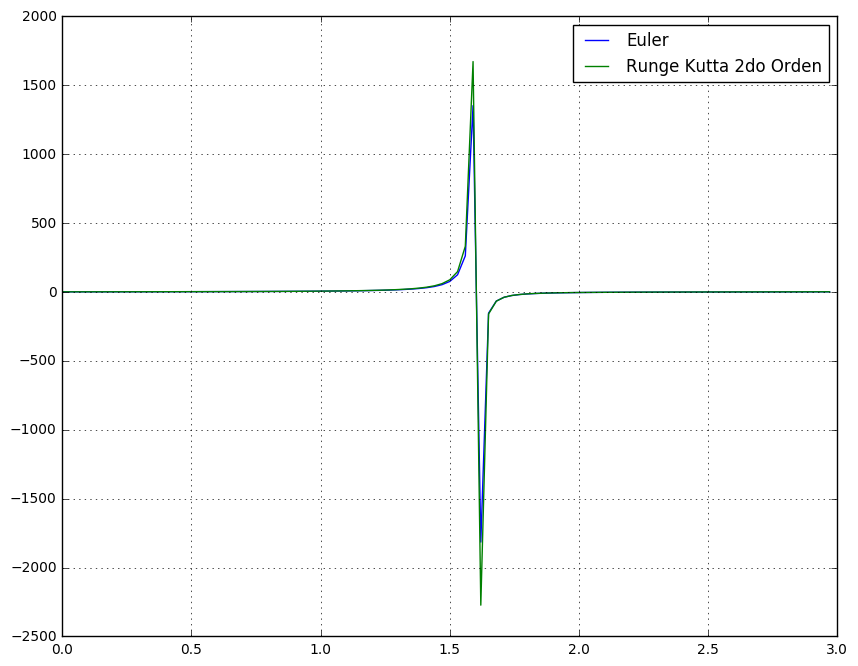

In [2]:
import numpy as np
import sympy as sy
from sympy.functions import cos, exp
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10.0, 8.0]

solver = OdeSolver()
x = sy.Symbol('x')
y = sy.Symbol('y')
f = (3*y - 0.5*exp(x)) / (2*cos(x))

points_euler = solver.euler(f, 0, 1.24, h=0.03)
print('Método: Euler')
print(points_euler)
points_rk2 = solver.rk2(f, 0, 1.24, h=0.03)
print('Método: Runge Kutta 2do Orden')
print(points_rk2)

plt.plot(points_euler[:, 0], points_euler[:, 1], label='Euler')
plt.plot(points_rk2[:, 0], points_rk2[:, 1], label='Runge Kutta 2do Orden')

plt.grid(True)
plt.legend()
plt.show()

### Ejercicio 1:
Modificar la clase OdeSolver incorporando un nuevo mentodo para solucionar una ODE utilizando Runge Kutta de 4to Orden.
Evaluar el mismo caso de prueba y comparar graficamente con los metodos anteriores.

## Resolviendo un sistema de ecuaciones ordinarias
Hay problemas que no pueden ser resueltos por una sola ecuación diferencial. Sino que deben ser resuelto por un sistema de $N$ ecuaciones, siendo $N>1$.

Consideremos un péndulo de longitud $L$ y masa $m$. Denotamos el ángulo que hace el péndulo con la vertical $\theta$, de modo que el péndulo está en reposo cuando $\theta=0$.

![pendulum](img/07-pendulum.png)

La dinámica del péndulo se rige por la segunda ley de Newton, $\tau=I\alpha$. Donde $\tau$ es el torque alrededor del punto de pivote, $I$ es la inercia rotacional del péndulo y $\alpha$ es su aceleración angular.
Realizando las siguientes sustituciones:
* Reemplazamos $\alpha$ por $\theta^{''}$. La aceleración es la segunda derivada de la posición.
* Reemplazamos $I$ por $mL^2$. Esto es la inersia rotacional de un punto de masa $m$ a una distancia $L$ del punto pivot.
* Reemplazamos $\tau$ por $-Lmg\;sin(\theta)$. El torque generado por una fuerza depende de la distancia entre el punto pivot y donde la fuerzas actuan, osea $L$, y la componente de la fuerza perpendicular a la línea que une el pivote y la masa $mg sin(\theta)$. El signo negativo es porque la gravedad actua como una fuerza opuesta a la posicion del pendulo: Cuando $\theta$ es positivo, la gravedad actua en dirección negativa y vice versa.

Luegos de las sustituciones, obtenemos:

$$-mg\;sin(\theta)L=mL^2\theta^{''}$$

Canselamos $mL$ en ambos lados y reagrupando:

$$\theta^{''}=-{g\over L}\;sin(\theta)$$

A continuación, añadimos amortiguación por fricción al modelo. Hacemos la hipótesis más simple posible sobre la fuerza de amortiguación, por lo que es proporcional a la velocidad. Dado que la longitud del arco y el ángulo central son proporcionales (con la constante de proporcionalidad L), no hace ninguna diferencia si usamos la velocidad lineal o angular. Habiendo seleccionado theta como nuestra variable dependiente, representaremos el amortiguamiento como proporcional a la velocidad angular, digamos, $-b\theta^{'}$. El signo negativo es porque la fuerza de amortiguación tiene que ser opuesta a la dirección del movimiento. Cuando incluimos este término en el modelo, nuestra ecuación se convierte en:

$$\theta^{''}=-b\theta^{'}-{g\over L}\;sin(\theta)$$

Definiendo ${g\over L}=c$, reemplazando y reagrupando nuestro modelo del lado izquierdo:

$$\theta^{''}+b\theta^{'}+c\;sin(\theta)=0$$

### Scipy para resolución de sistemas de ecuaciones diferenciales ordinarias
Scipy tiene implementanda una función para resolusión de sistemas de ecuaciones ordinarias de primer orden llamada [odeint]('https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html#scipy.integrate.odeint'). 
Como nuestra ecuación diferencial es de segundo orden, primero debemos convertirla en un sistema de 2 ecuaciones diferenciales de primer orden. De esta forma nuestro sistema quedaria asi:

$\theta^{'}(t) = \omega(t)$

$\omega^{'}(t)=b\omega(t)+c\;sin(\theta)$

Siendo $y$ el vector $[\theta,\omega]$. Implementamos el sistema de ecuaciones diferenciales de primer orden en Python como:

In [3]:
def pend(y, t, b, c):
    theta, omega = y
    dydt = [omega, -b*omega - c*np.sin(theta)]
    return dydt

Asumimos que las constantes son $b=0.25$ y $c=5.0$:

In [4]:
b = 0.25
c = 5.0

Para las condiciones iniciales, asumimos que el pendulo se encuentra casi vertical con $\theta(0)=\pi-0.1$, y que el mismo se encuentra inicialmente en reposo, por lo tanto, $\omega(0)=0$:

In [5]:
y0 = [np.pi - 0.1, 0.0]

Vamos a generar una solución de 300 muestras equidistantes en el intervalo $0<=t<=30$, por lo tanto nuestro arrat $t$ es:

In [6]:
t = np.linspace(0, 30, 300)

Llamamos a la función odeint para generar la solucion. Para pasar los parametros $b$ y $c$ a la función usamos el parametro 'args'.

In [7]:
from scipy.integrate import odeint
sol = odeint(pend, y0, t, args=(b, c))

La solución es un array con shape (300, 2). La primera columna es $\theta(t)$, la segunda es $\omega(t)$. En el siguiente código realizamos el plot de la solución encontrada:

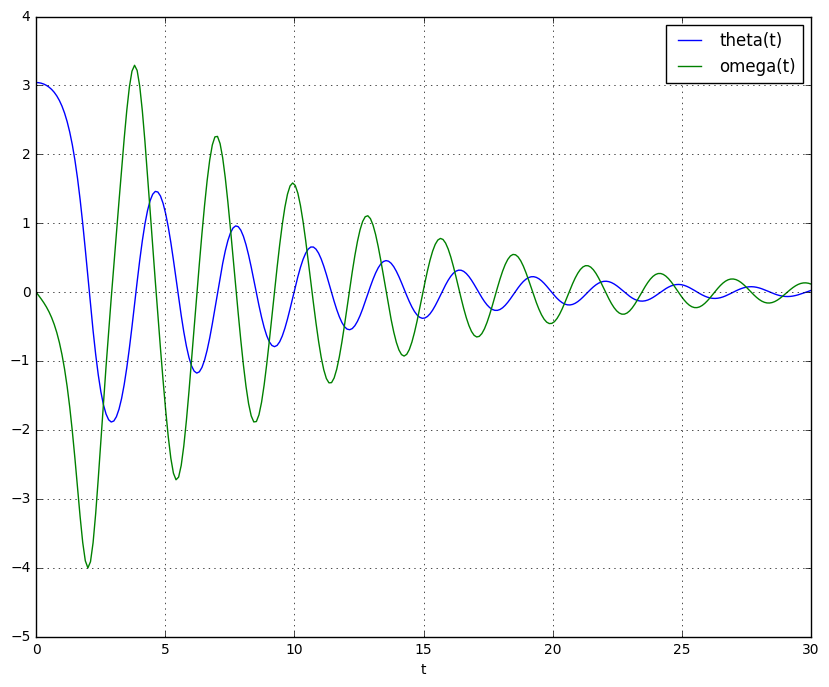

In [8]:
import matplotlib.pyplot as plt
plt.plot(t, sol[:, 0], 'b', label='theta(t)')
plt.plot(t, sol[:, 1], 'g', label='omega(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

### Ejercicio 2
1. Buscar una ecuacion diferencial ordinaria basado en un modelo real. 
2. Publicar en el foro del curso, creado para tal fin, el modelo elegido con una breve descripción y un el nombre de los integrantes del grupo.
3. Transformar, si es necesario, la ecuacion diferencial en un sistema de ecuaciones de primer orden.
4. Resolver el sistema utilizando [odeint]('https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html#scipy.integrate.odeint'). 
5. Graficar los resultados.

**Aclaración:** No se pueden repetir los modelos elegidos entre los grupos. En el caso de que dos grupos elijan el mismo modelo, tendra prioridad el grupo que realizo el post primero en el foro. El segundo grupo debera buscar otro nuevo. 